In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
pd.reset_option('display.max_rows', None)

### Voice Based Features Analysis For The Parkinson's Patient Detection
The goal of this project is to identity the voice features that can distinguish Parkinson's from healthy individuals.

In [3]:
df = pd.read_csv('../data/parkinsons.csv').drop(columns='name')

In [4]:
df.shape

(195, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [6]:
df[df['status'] == 0].describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.010368,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.022060,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.026330,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001908,0.002228,0.005725,0.020210,0.189250,...,0.034540,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.070080,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


In [8]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [9]:
correlation = df.corr()['status'].drop('status').sort_values(ascending=False)
palette = []
for value in correlation:
    if value > 0:
        palette.append('green')
    else:
        palette.append('red')

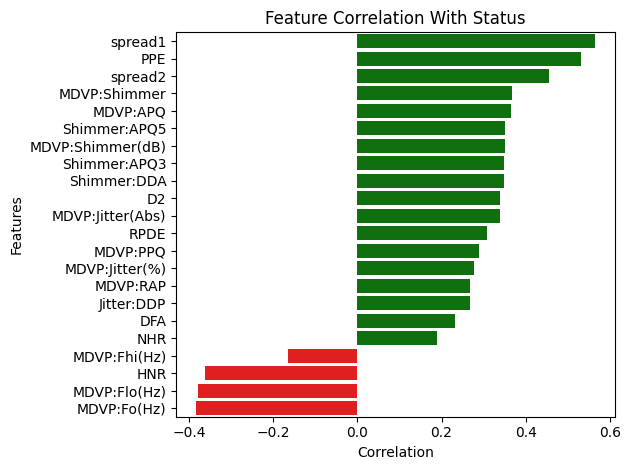

In [10]:
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette=palette,legend=False)
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.title("Feature Correlation With Status")
plt.tight_layout()

### Feature Correlation with Disease Status
The bar plot below shows how each feature correlates with the `status` variable

- **Positive correlation (green)** → Feature values are generally higher in Parkinson’s patients
- **Negative correlation (red)** → Feature values are generally lower in Parkinson’s patients

### Observations:
- `spread1`, `PPE` show **strong positive** correlation with Parkinson’s
- `Fo`, `Flo`, `HNR` show **negative** correlation, indicating these values tend to be **lower** in patients


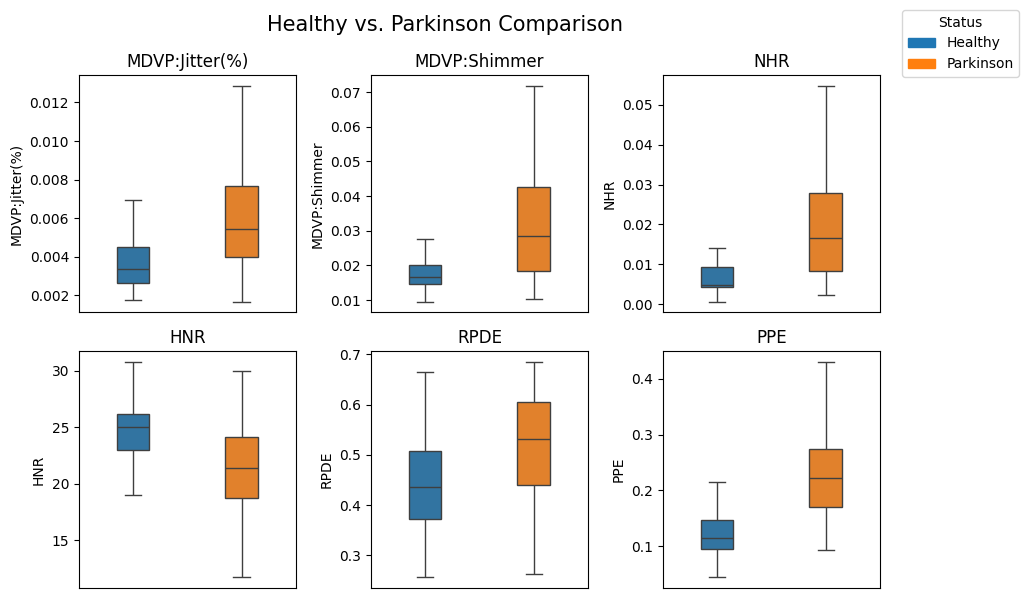

In [11]:
features = ['MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'PPE']

fig = plt.figure(figsize=(9, 6))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    ax = sns.boxplot(x='status', y=col, data=df, showfliers=False, hue='status', legend=False, width=.3)
    plt.title(col)
    ax.set_xlabel('')
    ax.set_xticks([])

handles = [
    mpatches.Patch(color=sns.color_palette()[0], label='Healthy'),
    mpatches.Patch(color=sns.color_palette()[1], label='Parkinson')
]
fig.legend(handles=handles, loc='upper left', title='Status', bbox_to_anchor=(1,1))
plt.suptitle("Healthy vs. Parkinson Comparison", fontsize=15)
plt.tight_layout()
plt.show()


### Feature Comparison Using Boxplots
The boxplots above show how certain key features differ between healthy individuals and Parkinson’s patients.

### Key Findings:
- **Jitter(%)** and **Shimmer** are significantly higher in Parkinson’s → Indicates unstable voice
- **PPE** and **RPDE** are also elevated → Captures voice irregularity
- **HNR** is **lower** in Parkinson’s → Suggests breathier, noisier voice


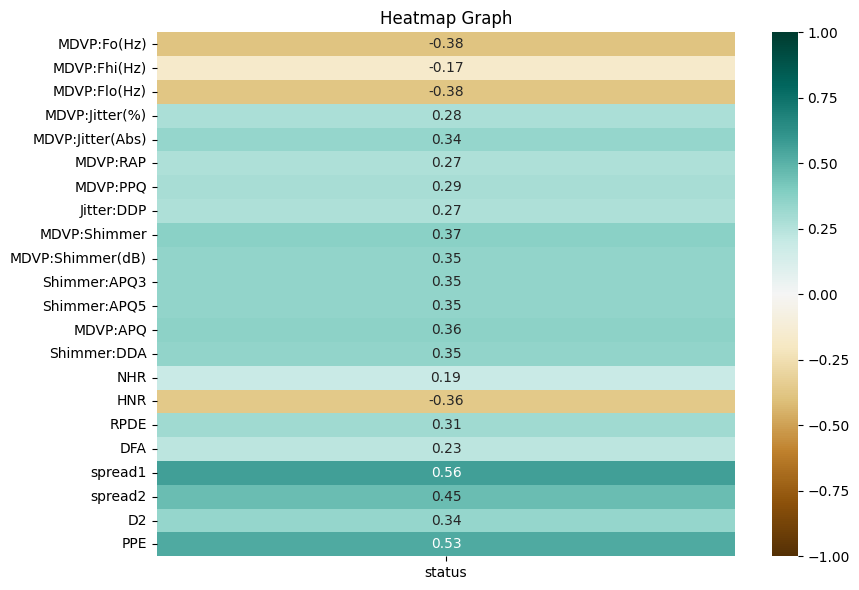

In [12]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr()[['status']].drop('status'), vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.title("Heatmap Graph")
plt.tight_layout()

### Heatmap of Feature Correlation with Status
The heatmap confirms previous insights and shows a broader correlation.

### Highlights:
- `spread1`, and `PPE` show the strongest **positive** correlation
- `Fo`, `Flo`, and `HNR` have the strongest **negative** correlation

✅ These correlations validate the relevance of vocal irregularities in Parkinson’s detection.


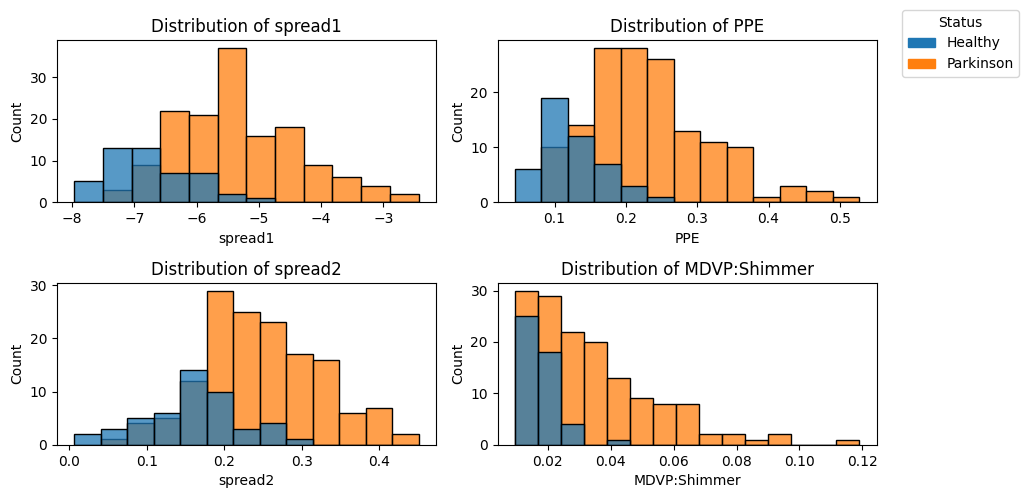

In [21]:
features = ['spread1', 'PPE', 'spread2', 'MDVP:Shimmer']

fig, axes = plt.subplots(2, 2, figsize=(9, 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='status', ax=axes[i], alpha=0.75, legend=False)
    axes[i].set_title(f'Distribution of {feature}')

handles = [
    mpatches.Patch(color=sns.color_palette()[0], label='Healthy'),
    mpatches.Patch(color=sns.color_palette()[1], label='Parkinson')
]
fig.legend(handles=handles, loc='upper left', title='Status', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [14]:
healthy_mean = df[df['status'] == 0].mean().round(decimals=5)
parkinson_mean = df[df['status'] == 1].mean()
range = np.where(healthy_mean > parkinson_mean, '>=', '<=')
mean_df = pd.DataFrame({'Normal': healthy_mean, 'Range':range, 'Parkinson Mean': parkinson_mean})
mean_df.drop('status')

,Normal,Range,Parkinson Mean
MDVP:Fo(Hz),181.93777,>=,145.180762
MDVP:Fhi(Hz),223.63675,>=,188.441463
MDVP:Flo(Hz),145.20729,>=,106.893558
MDVP:Jitter(%),0.00387,<=,0.006989
MDVP:Jitter(Abs),0.00002,<=,0.000051
MDVP:RAP,0.00193,<=,0.003757
MDVP:PPQ,0.00206,<=,0.003900
Jitter:DDP,0.00578,<=,0.011273
MDVP:Shimmer,0.01762,<=,0.033658
MDVP:Shimmer(dB),0.16296,<=,0.321204
